In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations

In [2]:
unique_followers = {}
brand_followers = {}
brands_list = []
limit = 600
row_id = 0
with open('data/brand_followers_final.tsv') as data_file:
    for row in data_file:
        followers = row.split()
        brand = followers.pop(0)
        if len(followers) > 1000:  #Filtering brands with less than 1000 followers
            brand_followers[brand] = set()
            brands_list.append(brand)
            for x in followers:
                f = int(x)
                brand_followers[brand].add(f)
                if f not in unique_followers.keys():
                    unique_followers[f] = set()
                unique_followers[f].add(brand)
        row_id += 1
        print('Loaded',row_id)
        if row_id == limit:
            break
                
print('No. of Unique Followers', len(unique_followers.keys()))
print('No. of Brands', len(brand_followers.keys()))

Loaded 1
Loaded 2
Loaded 3
Loaded 4
Loaded 5
Loaded 6
Loaded 7
Loaded 8
Loaded 9
Loaded 10
Loaded 11
Loaded 12
Loaded 13
Loaded 14
Loaded 15
Loaded 16
Loaded 17
Loaded 18
Loaded 19
Loaded 20
Loaded 21
Loaded 22
Loaded 23
Loaded 24
Loaded 25
Loaded 26
Loaded 27
Loaded 28
Loaded 29
Loaded 30
Loaded 31
Loaded 32
Loaded 33
Loaded 34
Loaded 35
Loaded 36
Loaded 37
Loaded 38
Loaded 39
Loaded 40
Loaded 41
Loaded 42
Loaded 43
Loaded 44
Loaded 45
Loaded 46
Loaded 47
Loaded 48
Loaded 49
Loaded 50
Loaded 51
Loaded 52
Loaded 53
Loaded 54
Loaded 55
Loaded 56
Loaded 57
Loaded 58
Loaded 59
Loaded 60
Loaded 61
Loaded 62
Loaded 63
Loaded 64
Loaded 65
Loaded 66
Loaded 67
Loaded 68
Loaded 69
Loaded 70
Loaded 71
Loaded 72
Loaded 73
Loaded 74
Loaded 75
Loaded 76
Loaded 77
Loaded 78
Loaded 79
Loaded 80
Loaded 81
Loaded 82
Loaded 83
Loaded 84
Loaded 85
Loaded 86
Loaded 87
Loaded 88
Loaded 89
Loaded 90
Loaded 91
Loaded 92
Loaded 93
Loaded 94
Loaded 95
Loaded 96
Loaded 97
Loaded 98
Loaded 99
Loaded 100
Loaded 1

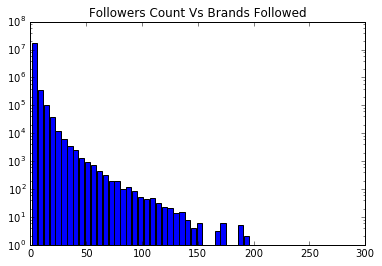

In [3]:
hist, bins = np.histogram(np.asarray([len(v) for v in list(unique_followers.values())]),bins=50)    
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.yscale("log")
plt.bar(center, hist, align='center', width=width)
plt.title('Followers Count Vs Brands Followed')

In [4]:
filtered_followers = list(map(lambda x: x[0], filter(lambda x: len(x[1]) >= 5, unique_followers.items())))
print('Unique Followers Pool',len(list(filtered_followers)))

Unique Followers Pool 964804


In [5]:
#follower_id = random.choice(filtered_followers)
#follower_id = sorted(unique_followers.items(), key=lambda x: len(x[1]), reverse=True)[choice][0]
#print('Chosen follower %d who follows %d brands'%(follower_id,len(unique_followers[follower_id])))

In [6]:
#unique_followers[follower_id]

In [7]:
pct = 0.005
follower_ids = random.sample(filtered_followers, int(len(filtered_followers) * pct))

In [21]:
len(follower_ids)

4824

In [8]:
def get_ranks(jaccard_scores_dict, removed_brands):
    ranked_list = []
    r = 1
    #print('Removed_brand', removed_brands)
    for tup in sorted(scores.items(), key=lambda x: x[1]/len(unique_followers[follower_id]), reverse=True):
        #print('Checking with',tup[0], 'and', removed_brands)
        if tup[0] == removed_brands:
            #print('Matched with',tup[0])
            #ranked_list.append((r, tup[0], tup[1]))
            return r
        r += 1
    
    return None

In [9]:
#pct = 0.25
brands_to_remove = {}
for follower_id in follower_ids:
    #brands_to_remove[follower_id] = random.sample(unique_followers[follower_id], int(len(unique_followers[follower_id]) * pct))
    brands_to_remove[follower_id] = random.choice(list(unique_followers[follower_id]))
    brand = brands_to_remove[follower_id]
    unique_followers[follower_id] = unique_followers[follower_id] - set([brand])
    brand_followers[brand] = brand_followers[brand] - set([follower_id])
    print('Removed edge', follower_id,'-',brand)

Removed edge 364125205 - dell
Removed edge 2159157536 - doritos
Removed edge 2287062486 - calvinklein
Removed edge 1854469466 - hormelfoods
Removed edge 557146268 - cottonelle
Removed edge 499178457 - gf_insider
Removed edge 48478192 - crystallight
Removed edge 618959290 - ford
Removed edge 108116301 - anthropologie
Removed edge 612115093 - juanitascocina
Removed edge 1703639101 - guess
Removed edge 514718408 - armani
Removed edge 1932146780 - htc
Removed edge 118629224 - adidas
Removed edge 528203196 - clairolcolor
Removed edge 859782774 - allure_magazine
Removed edge 2469838537 - disney
Removed edge 2192106284 - hp
Removed edge 2305816357 - burberry
Removed edge 752822966 - dior
Removed edge 1279153548 - dermorganic
Removed edge 614646600 - fritolay
Removed edge 1549130772 - ford
Removed edge 138901754 - drpepper
Removed edge 931115064 - cadillac
Removed edge 385111058 - cadillac
Removed edge 36792290 - bugatti
Removed edge 1533967614 - chobani
Removed edge 1908002540 - instyle
Remov

In [10]:
N_BRANDS = len(brands_list)
DIST_MAT = np.zeros((N_BRANDS,N_BRANDS))
    
for tuple_pair in combinations(enumerate(brands_list),2):
    b1 = brand_followers[tuple_pair[0][1]]
    b2 = brand_followers[tuple_pair[1][1]]
        
    #Jaccard Similarity Measure
    common_connections = len(b1.intersection(b2))
    total_connections = len(b1) + len(b2) - common_connections #More efficient than set(b1).union(b2)
    sim = common_connections/total_connections
        
    #Symmetrix Distance Matrix
    DIST_MAT[tuple_pair[0][0] , tuple_pair[1][0]] = DIST_MAT[tuple_pair[1][0] , tuple_pair[0][0]] = sim

In [11]:
prediction_rank = {}
for follower_id in follower_ids:
    brands_followed = unique_followers[follower_id]
    #print('Follower ID', follower_id)
    scores = {}
    for brand_followed in brands_followed:
        #print('Brand', brand_followed)
        curr_brand_idx = brands_list.index(brand_followed)
        for brand_not_followed in enumerate(brands_list):
            
            if brand_not_followed[1] in brands_followed:
                continue
            elif brand_not_followed[1] not in scores.keys():
                #print('Brand not followed', brand_not_followed[1])
                scores[brand_not_followed[1]] = DIST_MAT[curr_brand_idx, brand_not_followed[0]]
            else:
                #print('Brand not followed', brand_not_followed[1])
                scores[brand_not_followed[1]] += DIST_MAT[curr_brand_idx, brand_not_followed[0]]

    prediction = sorted(scores.items(), key=lambda x: x[1]/len(brands_followed), reverse=True)
    prediction_rank[follower_id] = get_ranks(scores,brands_to_remove[follower_id])
    #prediction = [x[1] for x in prediction_rank[follower_id][:len(brands_to_remove[follower_id])]]
    #print('Predicted:\n',prediction)
    #print('Actual:\n', brands_to_remove[follower_id])
    #n_correct = len(set(brands_to_remove[follower_id]) & set(prediction))
    #print('Jaccard finds %d/%d for accuracy of %.3f' % (n_correct, len(brands_to_remove[follower_id]), 
    #                                                (1. * n_correct / len(brands_to_remove[follower_id]))))

In [12]:
from functools import reduce
rank_sum = reduce(lambda x,y: x+y, prediction_rank.values())
print('Mean Rank', rank_sum/len(prediction_rank.values()))

Mean Rank 26.373548922056386


In [13]:
prediction_rank

{1922121732: 123,
 596800023: 1,
 106848262: 117,
 1005846535: 10,
 1856535212: 3,
 1417282903: 56,
 832442269: 14,
 498565134: 2,
 1337958415: 6,
 213121731: 86,
 1678072494: 9,
 760735069: 3,
 1752522776: 7,
 9760772: 14,
 1246812847: 13,
 618992986: 12,
 1581801505: 23,
 171204643: 1,
 2203090984: 4,
 1727152172: 1,
 354426925: 1,
 74530863: 167,
 1461633072: 4,
 162521138: 8,
 716595252: 6,
 43950136: 120,
 35175092: 49,
 2264350778: 3,
 144867389: 14,
 2327527486: 25,
 370688063: 72,
 2340757568: 1,
 26002784: 2,
 2252259396: 1,
 752822966: 2,
 1060274246: 1,
 166993992: 1,
 41885769: 3,
 375840847: 42,
 1266040909: 196,
 273080398: 1,
 2390978573: 1,
 234539612: 6,
 24215636: 70,
 942665742: 66,
 51585110: 185,
 1551425623: 2,
 422850575: 14,
 247128156: 71,
 2235039837: 53,
 36257437: 5,
 1914003554: 178,
 259416163: 35,
 1394376804: 1,
 18489445: 118,
 213322752: 25,
 2411604668: 66,
 993640554: 1,
 272760945: 5,
 750931987: 5,
 602775668: 3,
 451821685: 12,
 104095862: 1,
 820

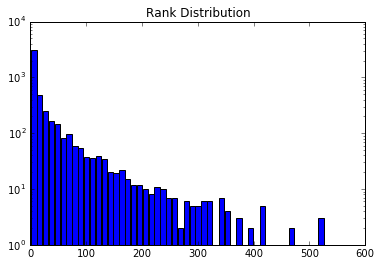

In [14]:
hist, bins = np.histogram(np.asarray(list(prediction_rank.values())),bins=50)    
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.yscale("log")
plt.bar(center, hist, align='center', width=width)
plt.title('Rank Distribution')

In [25]:
mean_rank = {}
followers_count = {}
for k in prediction_rank:
    count = len(unique_followers[k])
    if count in mean_rank.keys():
        mean_rank[count] += prediction_rank[k]
        followers_count[count] += 1
    else:
        mean_rank[count] = prediction_rank[k]
        followers_count[count] = 1

In [26]:
followers_count

{4: 1355,
 5: 896,
 6: 579,
 7: 389,
 8: 310,
 9: 240,
 10: 165,
 11: 144,
 12: 129,
 13: 109,
 14: 85,
 15: 76,
 16: 46,
 17: 39,
 18: 39,
 19: 26,
 20: 19,
 21: 26,
 22: 18,
 23: 11,
 24: 11,
 25: 13,
 26: 12,
 27: 6,
 28: 4,
 29: 6,
 30: 10,
 31: 1,
 32: 6,
 33: 3,
 34: 3,
 35: 1,
 36: 3,
 37: 6,
 38: 4,
 39: 2,
 40: 2,
 42: 4,
 43: 1,
 44: 3,
 45: 3,
 47: 2,
 49: 2,
 51: 2,
 52: 2,
 55: 1,
 57: 1,
 58: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 77: 1,
 82: 1,
 90: 1}

In [27]:
for k in mean_rank:
    mean_rank[k] //= followers_count[k]
mean_rank

{4: 26,
 5: 25,
 6: 24,
 7: 22,
 8: 31,
 9: 29,
 10: 20,
 11: 24,
 12: 17,
 13: 26,
 14: 21,
 15: 24,
 16: 36,
 17: 28,
 18: 47,
 19: 22,
 20: 29,
 21: 17,
 22: 32,
 23: 59,
 24: 37,
 25: 23,
 26: 34,
 27: 13,
 28: 21,
 29: 15,
 30: 23,
 31: 4,
 32: 50,
 33: 11,
 34: 85,
 35: 40,
 36: 21,
 37: 74,
 38: 20,
 39: 18,
 40: 5,
 42: 18,
 43: 5,
 44: 74,
 45: 11,
 47: 164,
 49: 152,
 51: 72,
 52: 115,
 55: 3,
 57: 3,
 58: 1,
 62: 135,
 63: 1,
 64: 6,
 65: 9,
 66: 7,
 77: 222,
 82: 16,
 90: 105}

In [29]:
good_predictions = []
bad_predictions = []
for k in prediction_rank:
    if prediction_rank[k] >= 300:
        bad_predictions.append(brands_to_remove[k])
    else:
        good_predictions.append(brands_to_remove[k])
set(bad_predictions) - set(good_predictions)

{'abreva',
 'activia',
 'afterglow',
 'alissacohen',
 'ancientminerals',
 'bathbodyworksau',
 'brazilianblwout',
 'canidaepetfood',
 'cardinalhealth',
 'casbahhamilton',
 'comfypaws',
 'cremeofnature',
 'customnails',
 'dum_dums',
 'dunbrodyhouse',
 'eaglepack',
 'evolvekefir',
 'fflpartnership',
 'gabrielcosmetic',
 'gomanga',
 'hannaford',
 'haute_cuisine',
 'hinoderice',
 'homeforgoodla',
 'hubertslemonade',
 'illyissimo',
 'jenospizza',
 'jewelosco'}